### New phantoms for the PDFF simulation experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat as loadmat 

# %matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
from utils import *
from utils_liver_phantom import *
import glob

In [2]:
# use this as it's more general
fat_model_H = np.load("./liver_phantom_data/fat_model/fat_model_ren_marrow.pickle", allow_pickle=True)
print(fat_model_H.keys())
fat_model_H['relAmps'], fat_model_H['freqs_ppm']

dict_keys(['freqs_ppm', 'relAmps', 'name'])


(array([0.08991009, 0.58341658, 0.05994006, 0.08491508, 0.05994006,
        0.01498501, 0.03996004, 0.00999001, 0.05694306]),
 array([-3.8 , -3.4 , -3.1 , -2.68, -2.46, -1.95, -0.5 ,  0.49,  0.59]))

In [3]:
phantom_name = 'liver'
mask_path = "./liver_phantom_data/DUKE_masks/*.mat"
slice_ind = 815
N_spins = 26 * 26
N_spins_dim = int(np.sqrt(N_spins))
gamBo = 42.6 * 3  # MHz
res_factor = 2
data_resolution = np.array([[1/N_spins_dim,1/N_spins_dim,1]])

# Load masks and indices
masks, indices = load_masks(mask_path)

# Generate mask array
arr = generate_mask_array(masks, indices)
arr[172:180, 30:35, slice_ind] = 6.0  # Modify specific slice

# Identify tissue types
tissue_types = [key for i in np.unique(arr[:, :, slice_ind]) if i != 0 for key, idx in indices.items() if idx == i]

# Create parameter maps
maps = create_parameter_maps(masks, indices, tissue_types, slice_ind)

# Process geometry
maps = process_geometry(maps, gamBo, N_spins_dim, res_factor)
print(f'Water maps shape {maps.shape}')

# Save to HDF5
data_offset = np.array([0, 0, 0])
# save_hdf5(phantom_name + '_W', maps[None, ...], data_resolution, data_offset)


Water maps shape (2600, 2600, 7)


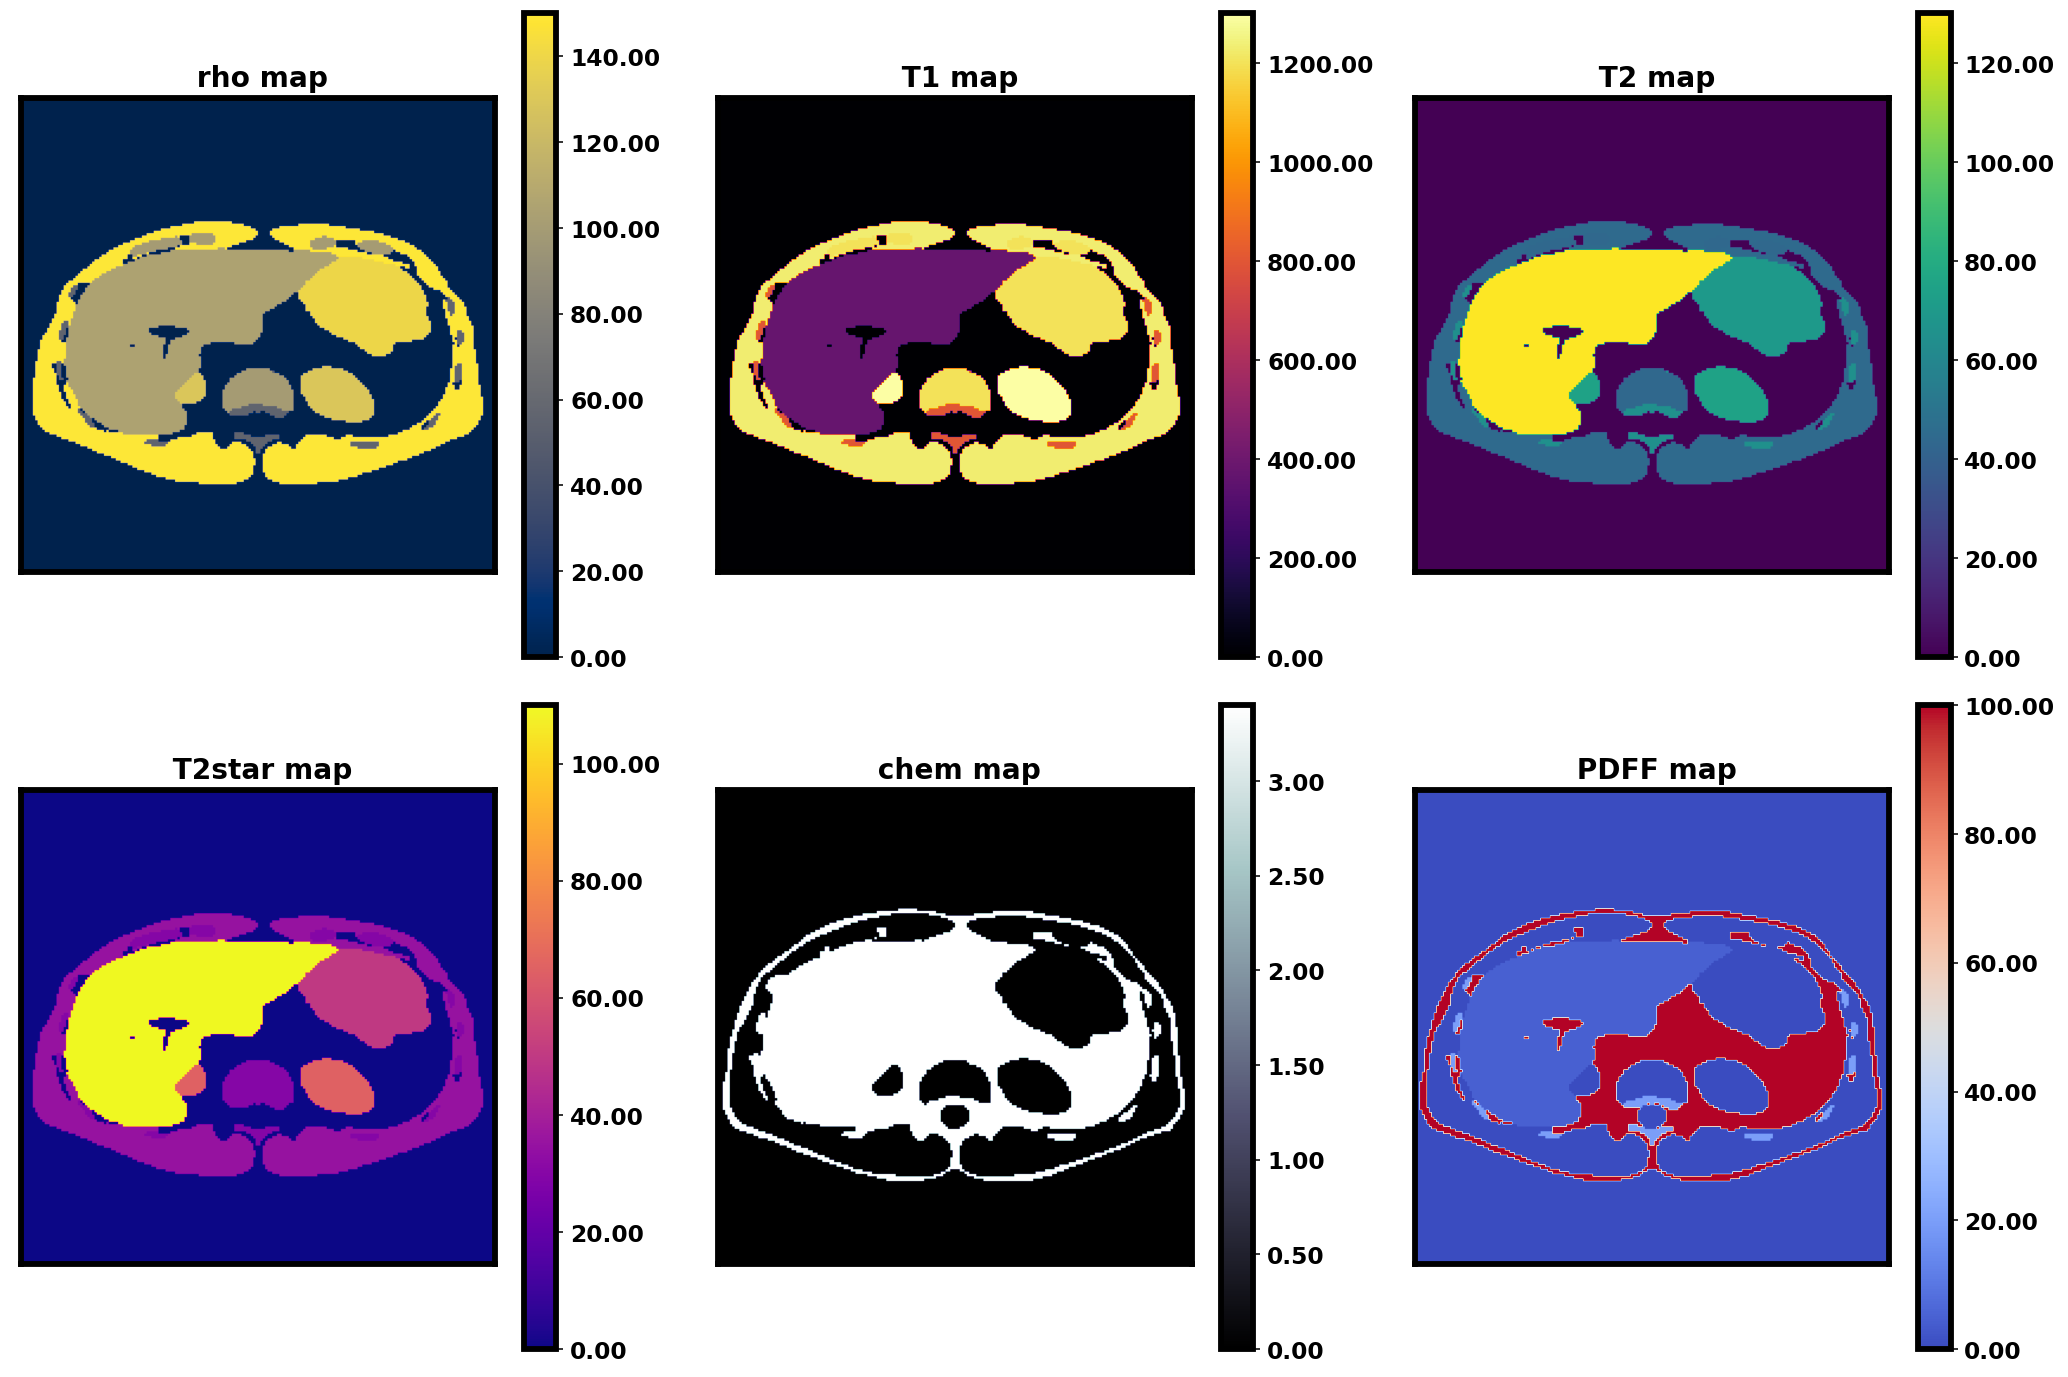

In [4]:
# Define parameter names corresponding to the generated maps
parameter_names = ["rho", "T1", "T2", "T2star", "chem", "PDFF"]

# Plot the maps
plot_maps(maps, parameter_names, figname=f"{phantom_name}_parameter_maps", title_prefix=" ")


In [5]:
# Generate fat samples
fat_maps = generate_fat_phantoms(maps, parameters, fat_model_H, data_resolution, phantom_name)
fat_maps.shape

Generating fat phantom liver_F1...
Saved fat phantom: liver_F1.h5
Generating fat phantom liver_F2...
Saved fat phantom: liver_F2.h5
Generating fat phantom liver_F3...
Saved fat phantom: liver_F3.h5
Generating fat phantom liver_F4...
Saved fat phantom: liver_F4.h5
Generating fat phantom liver_F5...
Saved fat phantom: liver_F5.h5
Generating fat phantom liver_F6...
Saved fat phantom: liver_F6.h5
Generating fat phantom liver_F7...
Saved fat phantom: liver_F7.h5
Generating fat phantom liver_F8...
Saved fat phantom: liver_F8.h5
Generating fat phantom liver_F9...
Saved fat phantom: liver_F9.h5


(9, 2600, 2600, 5)

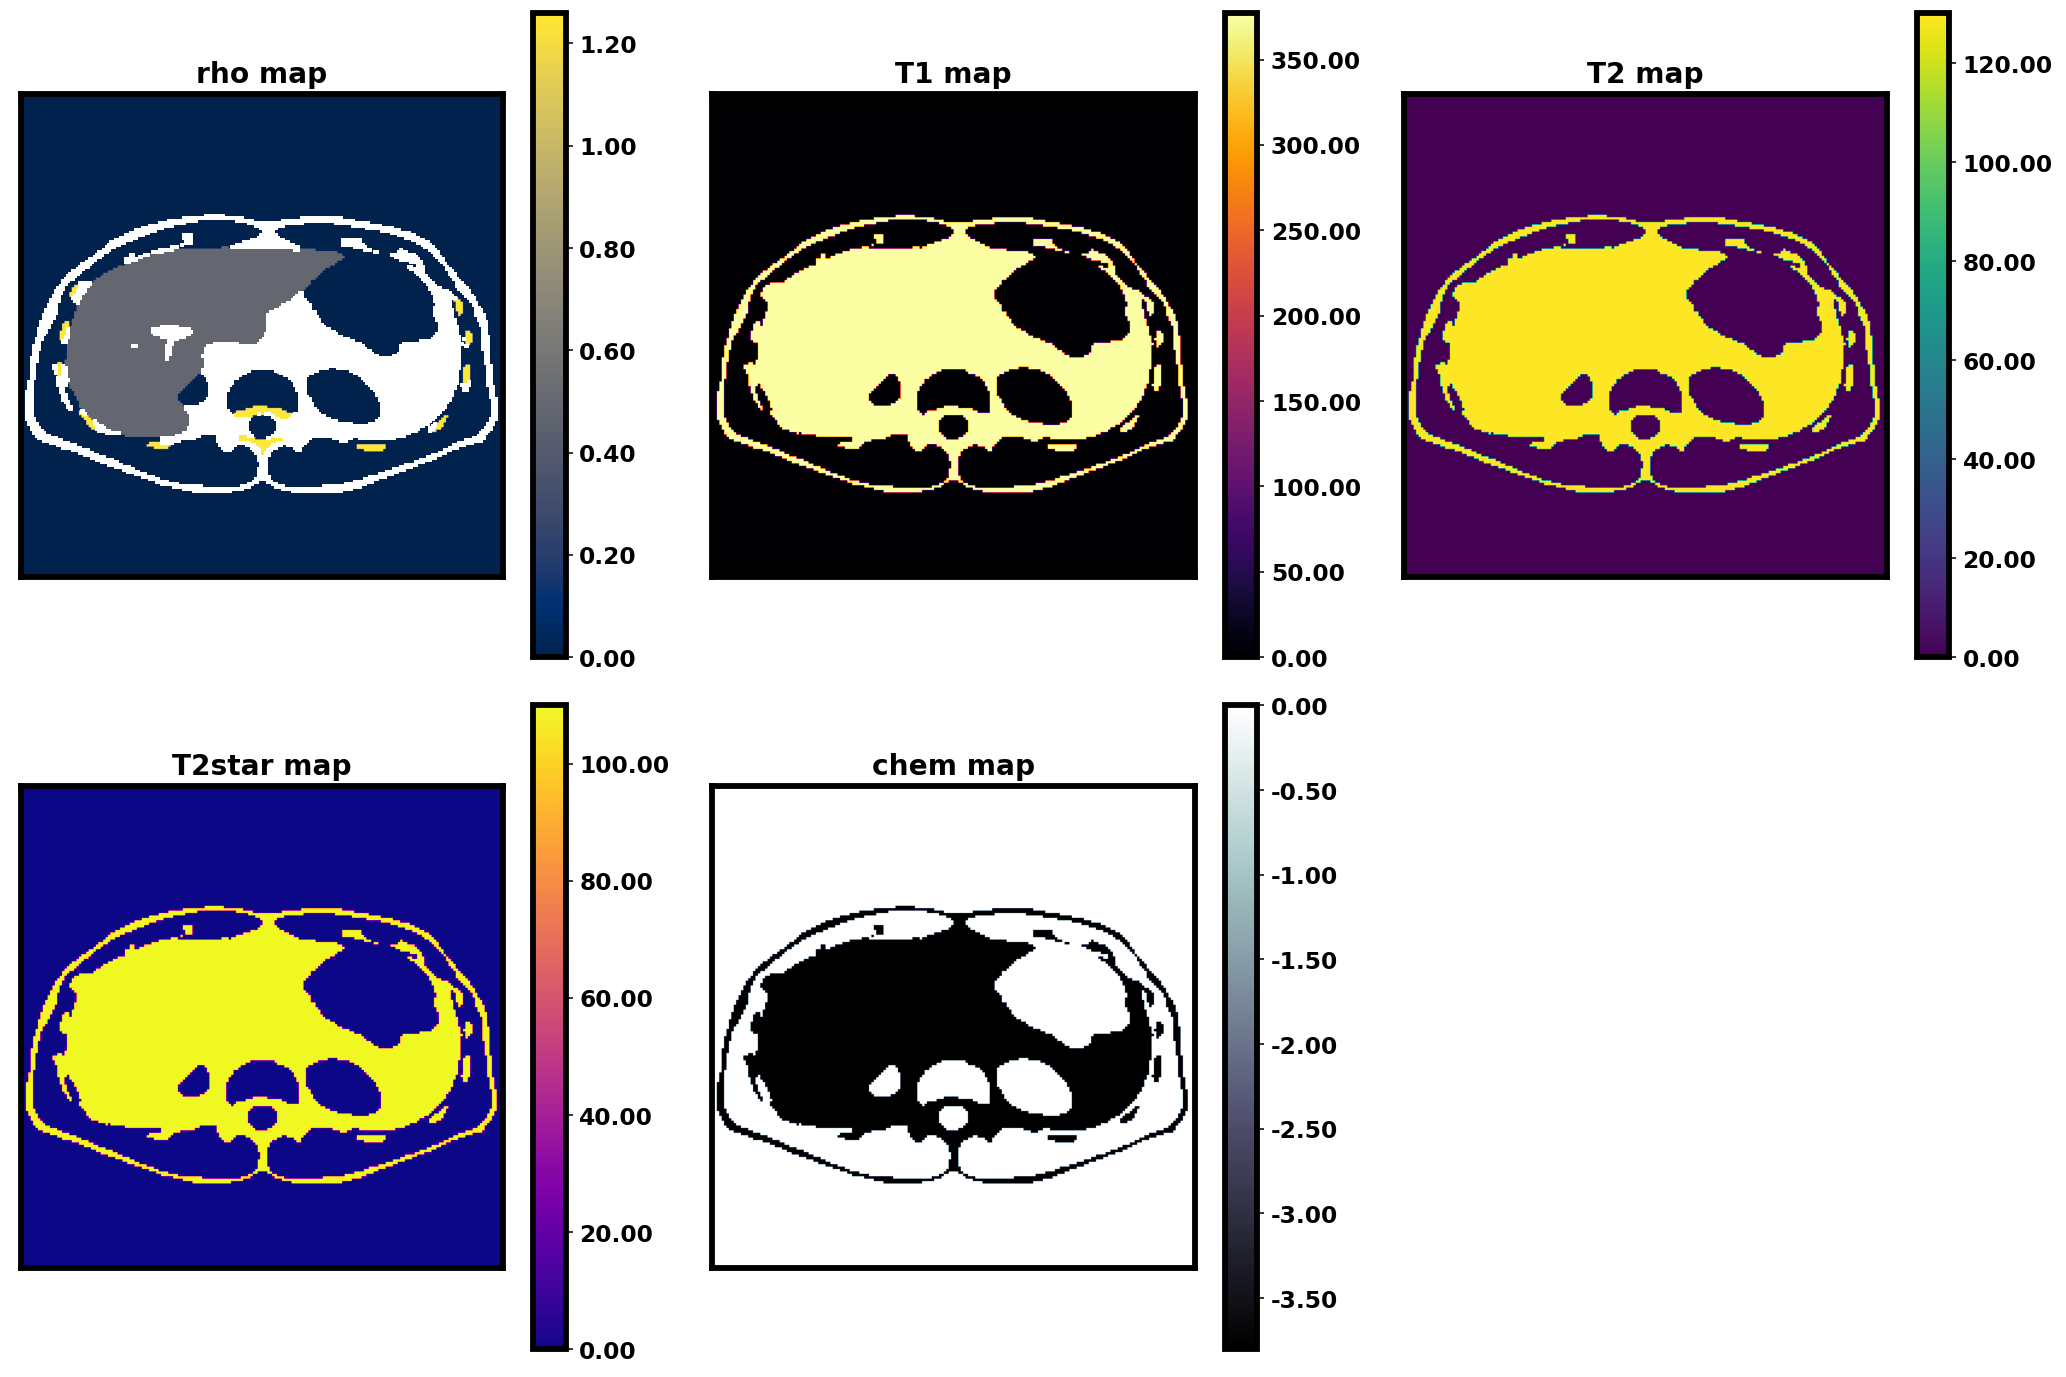

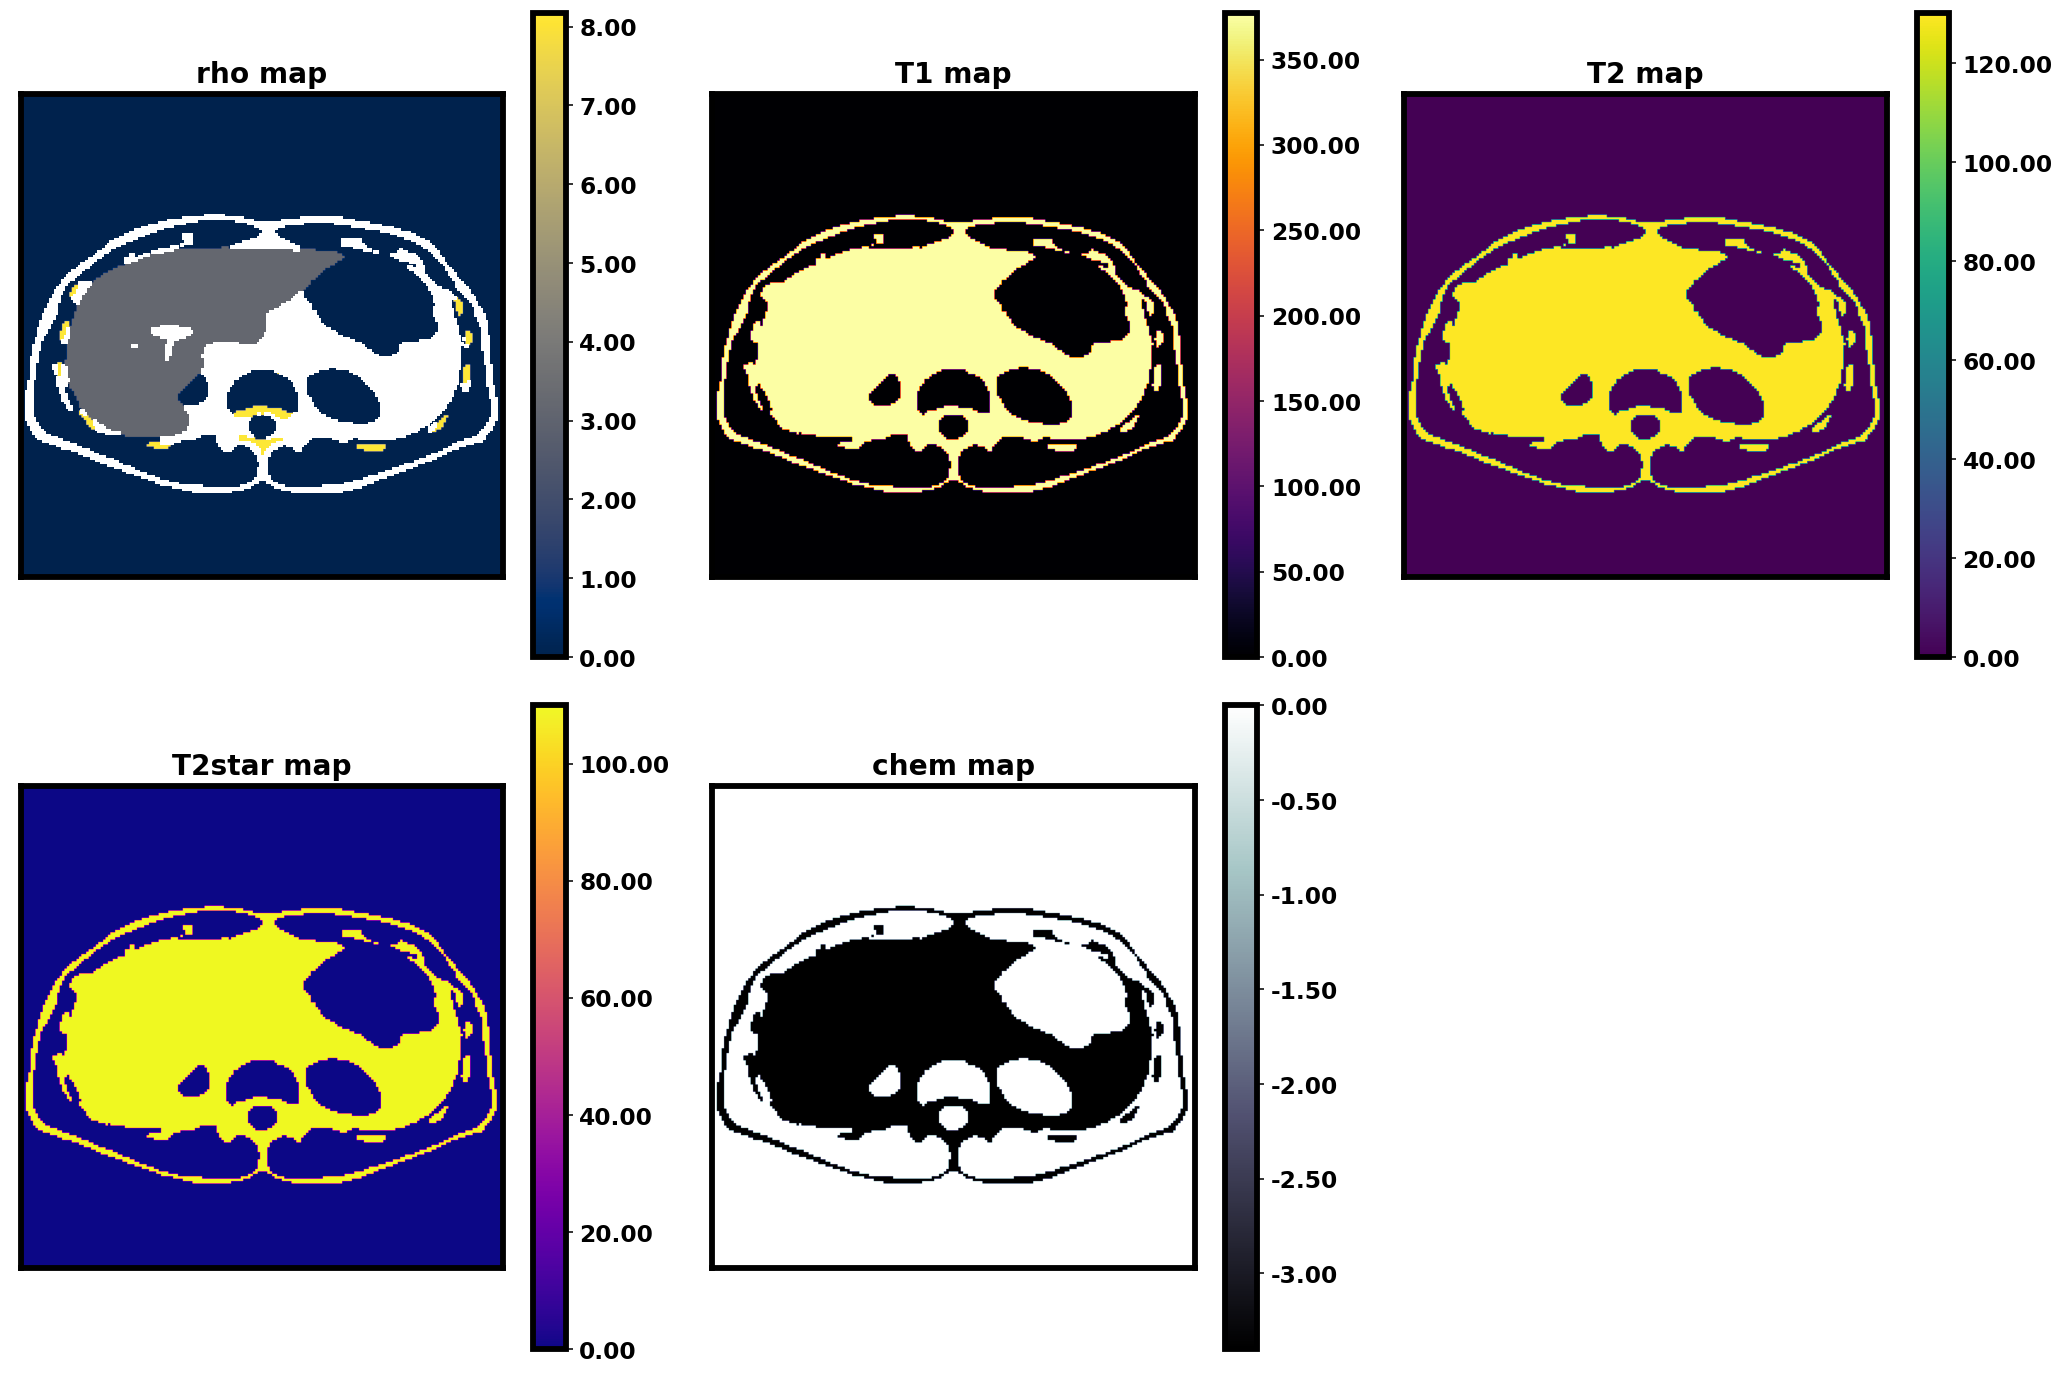

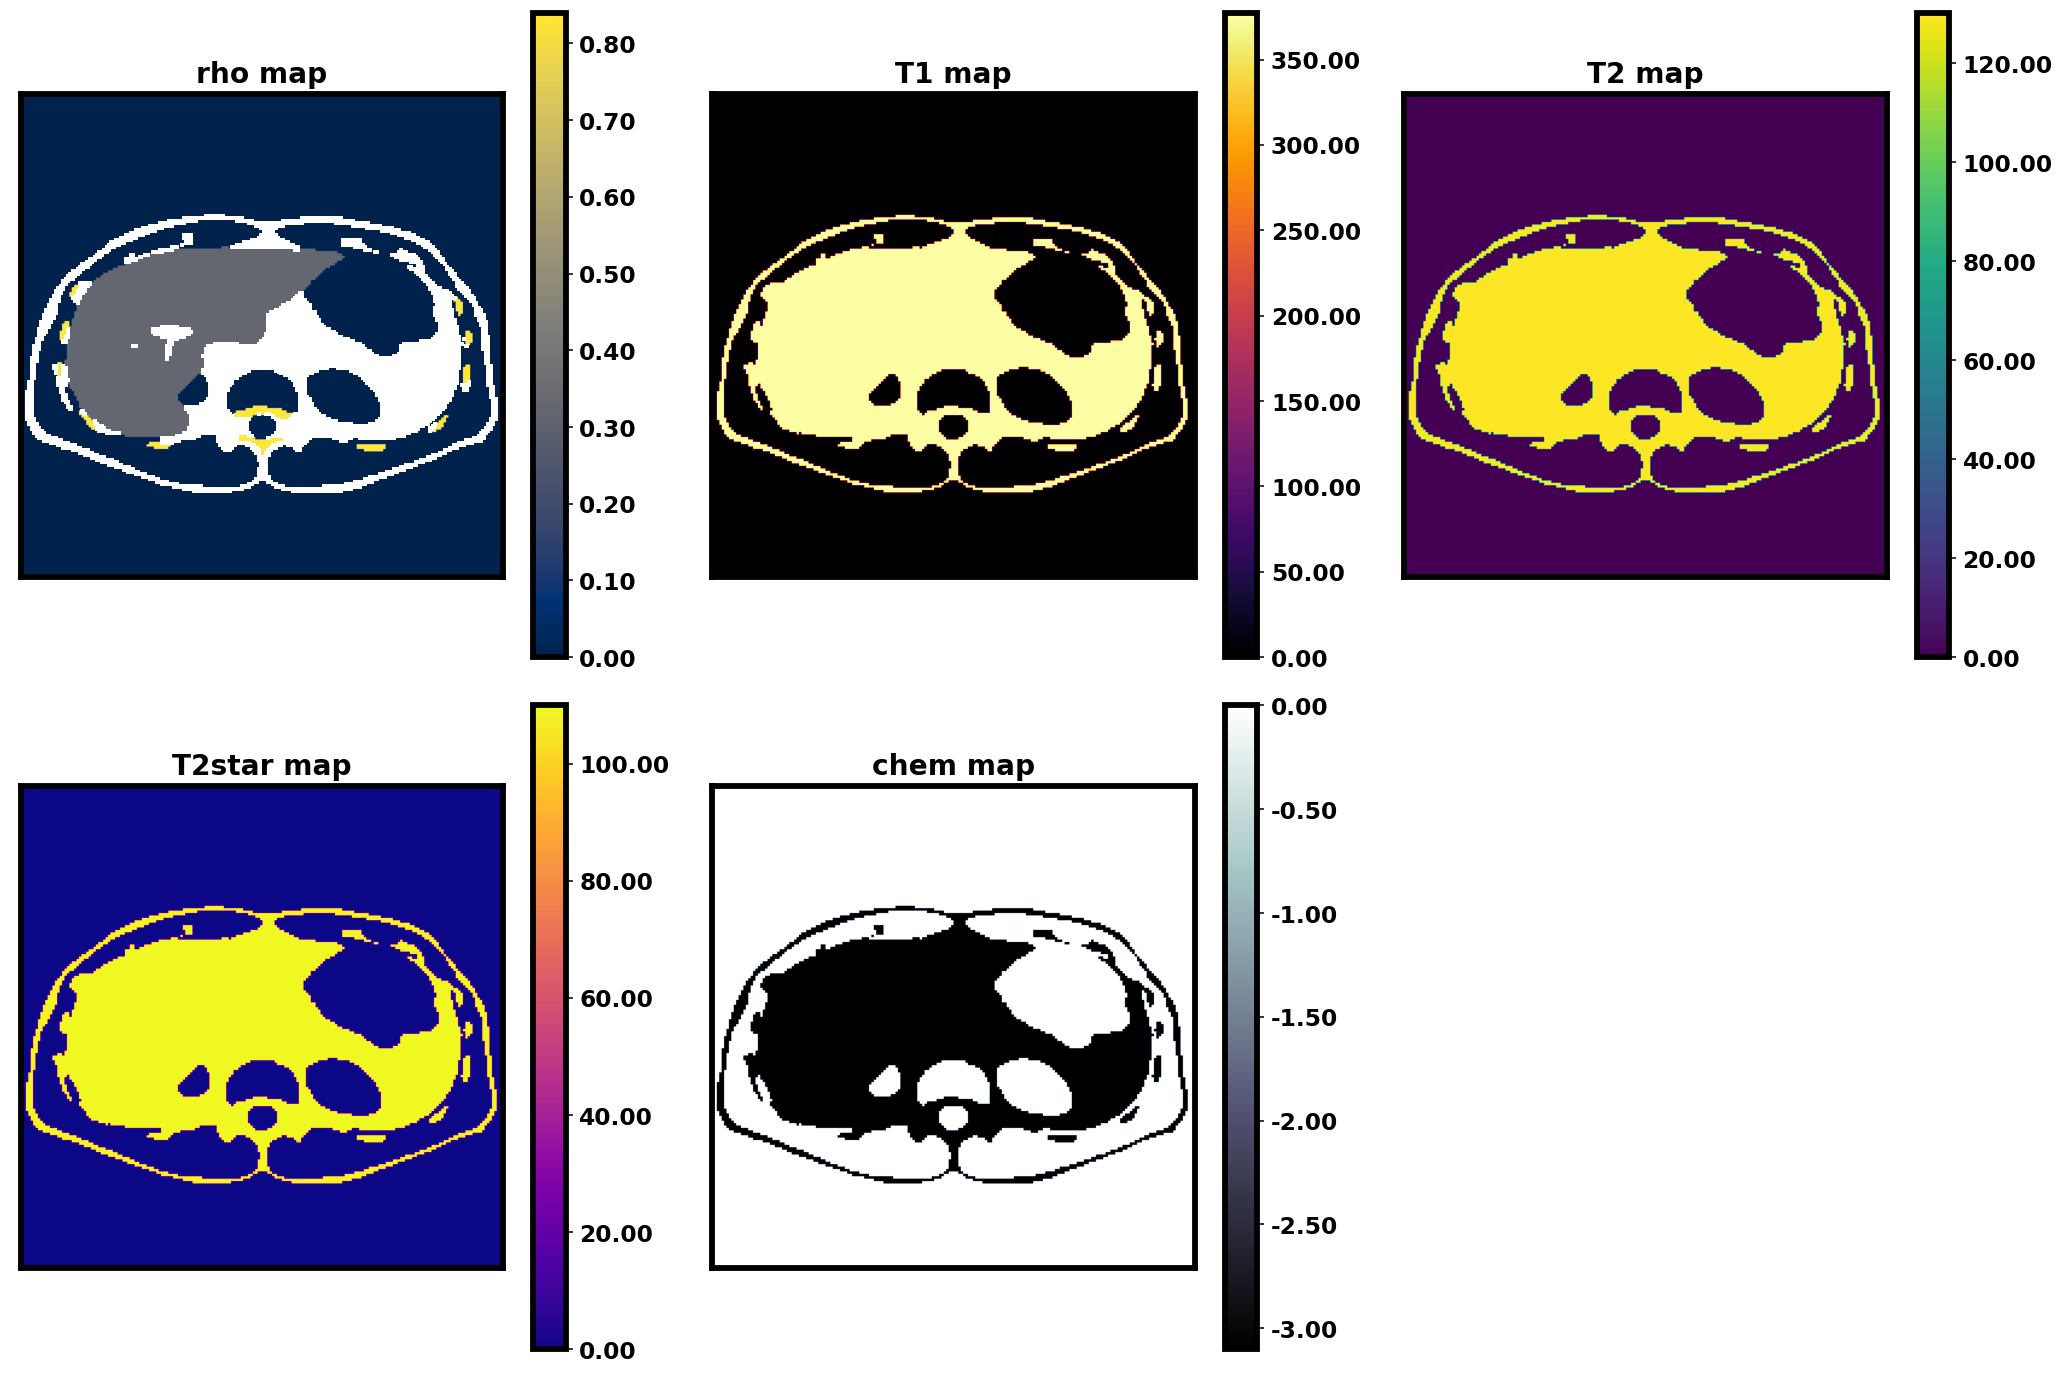

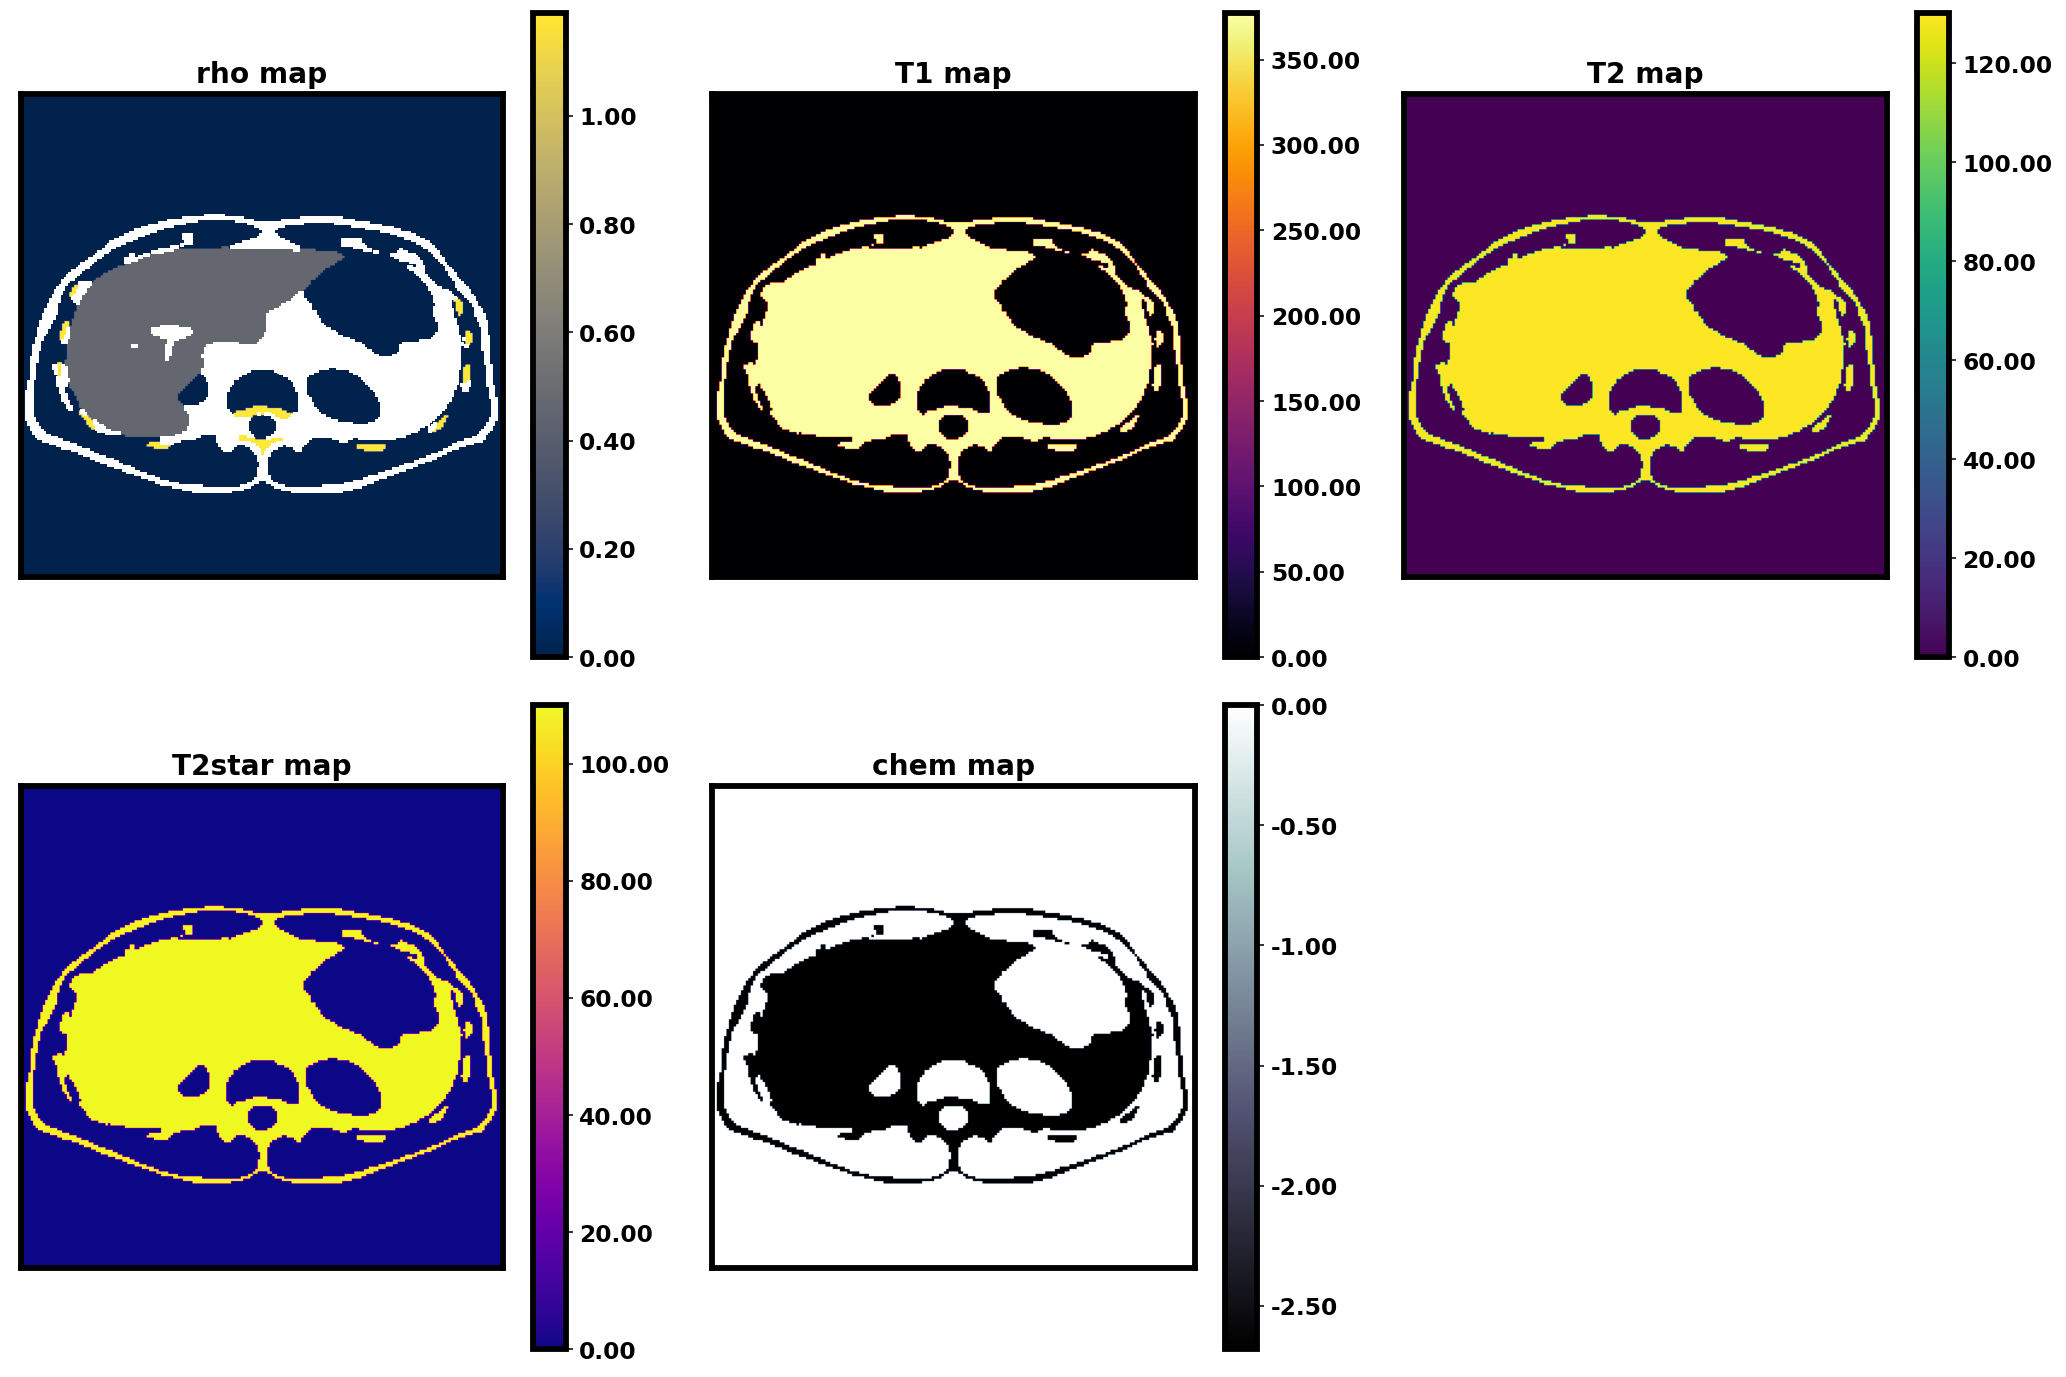

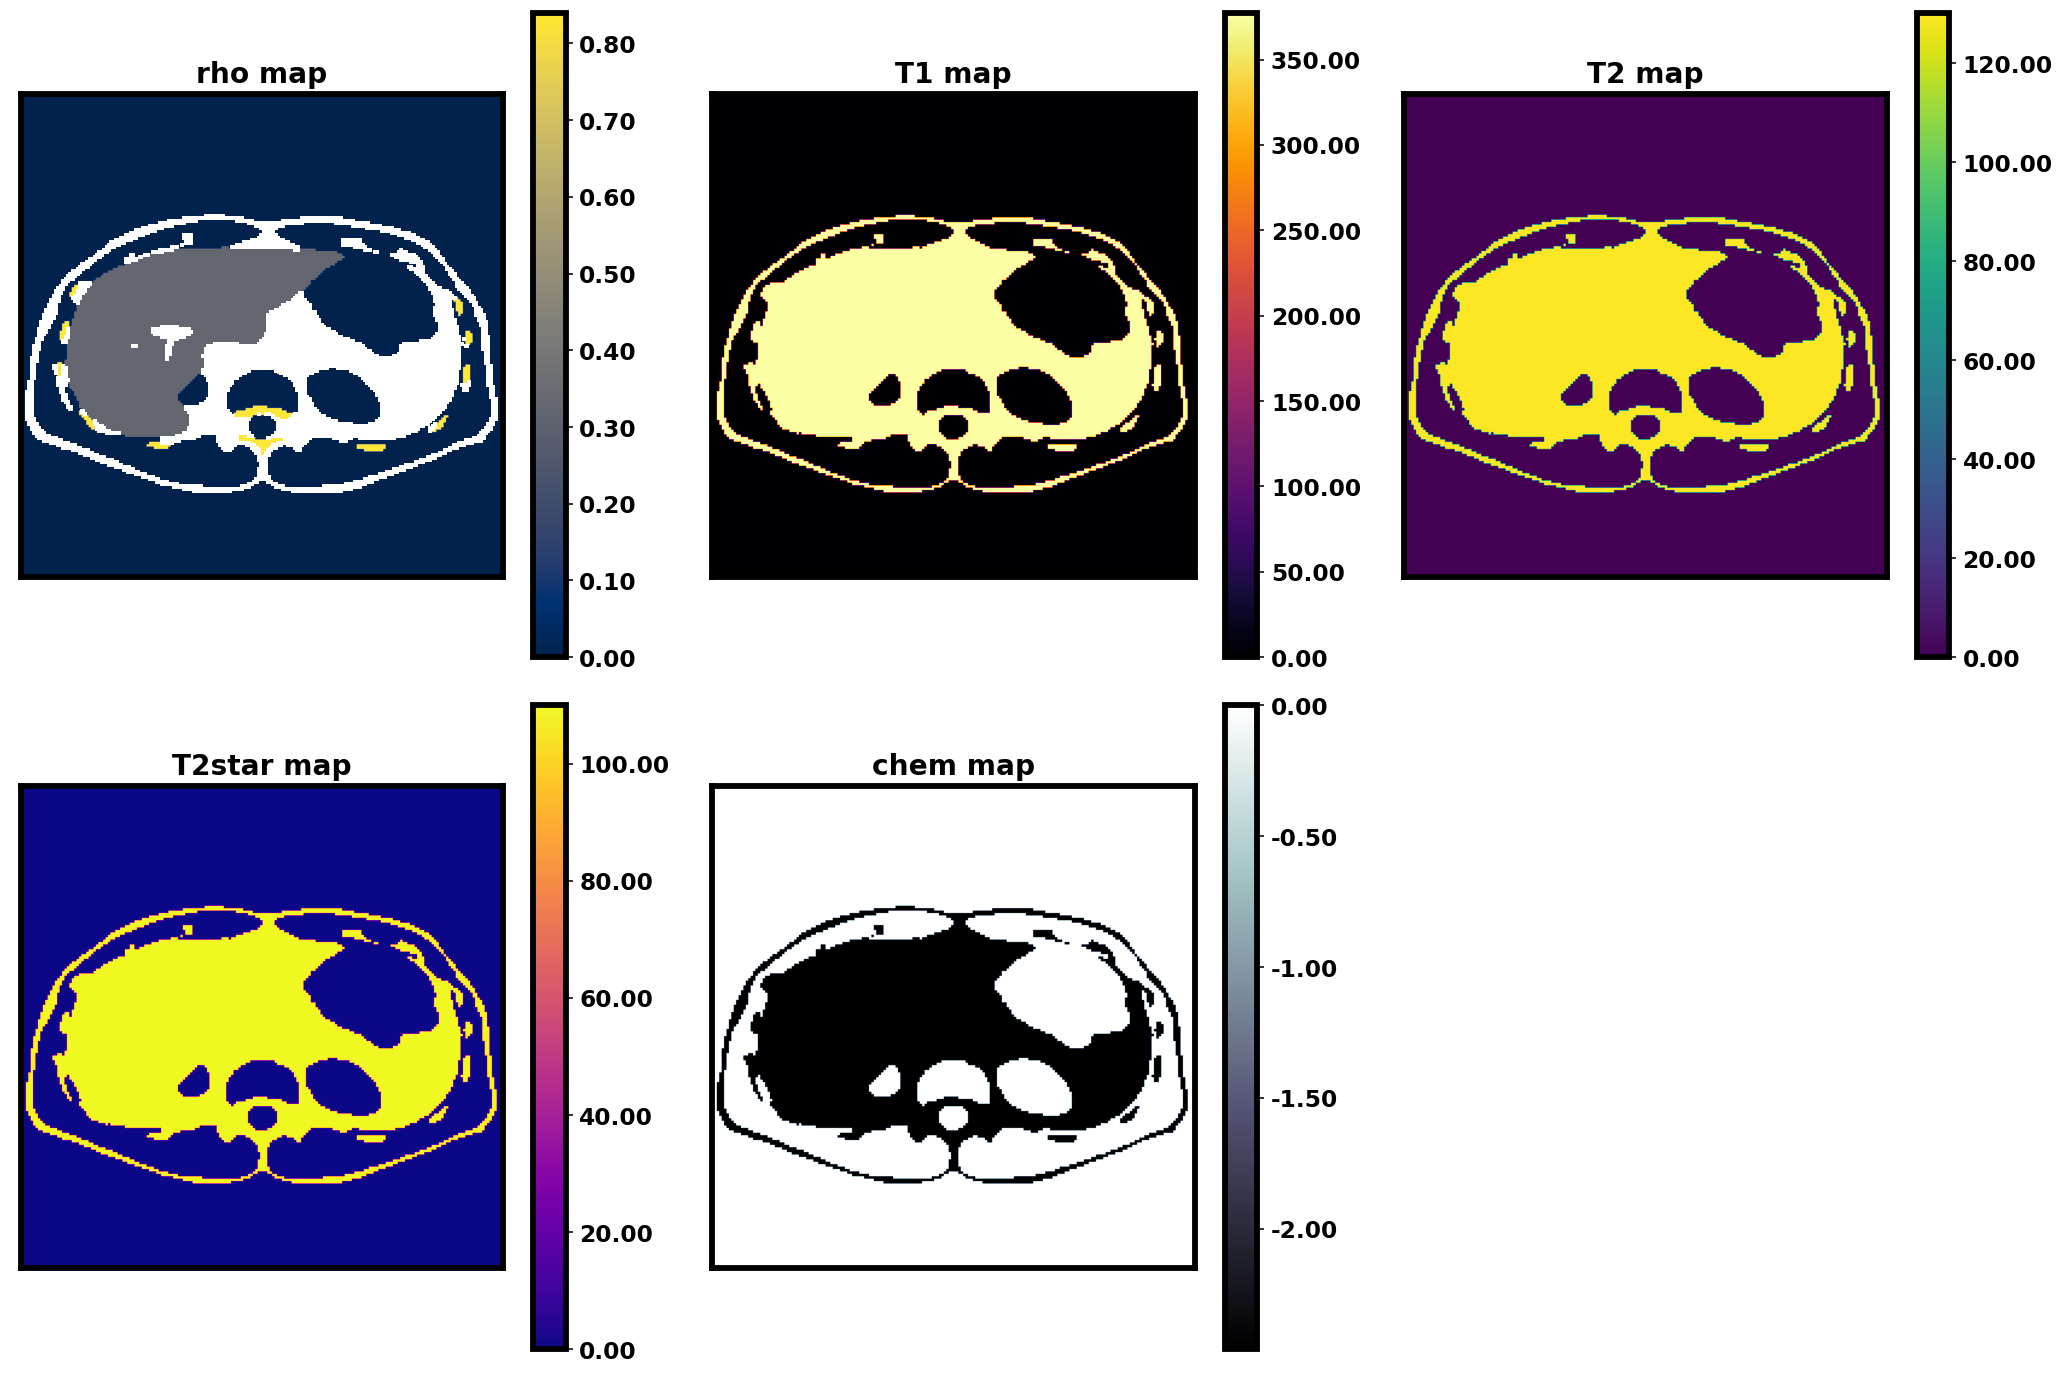

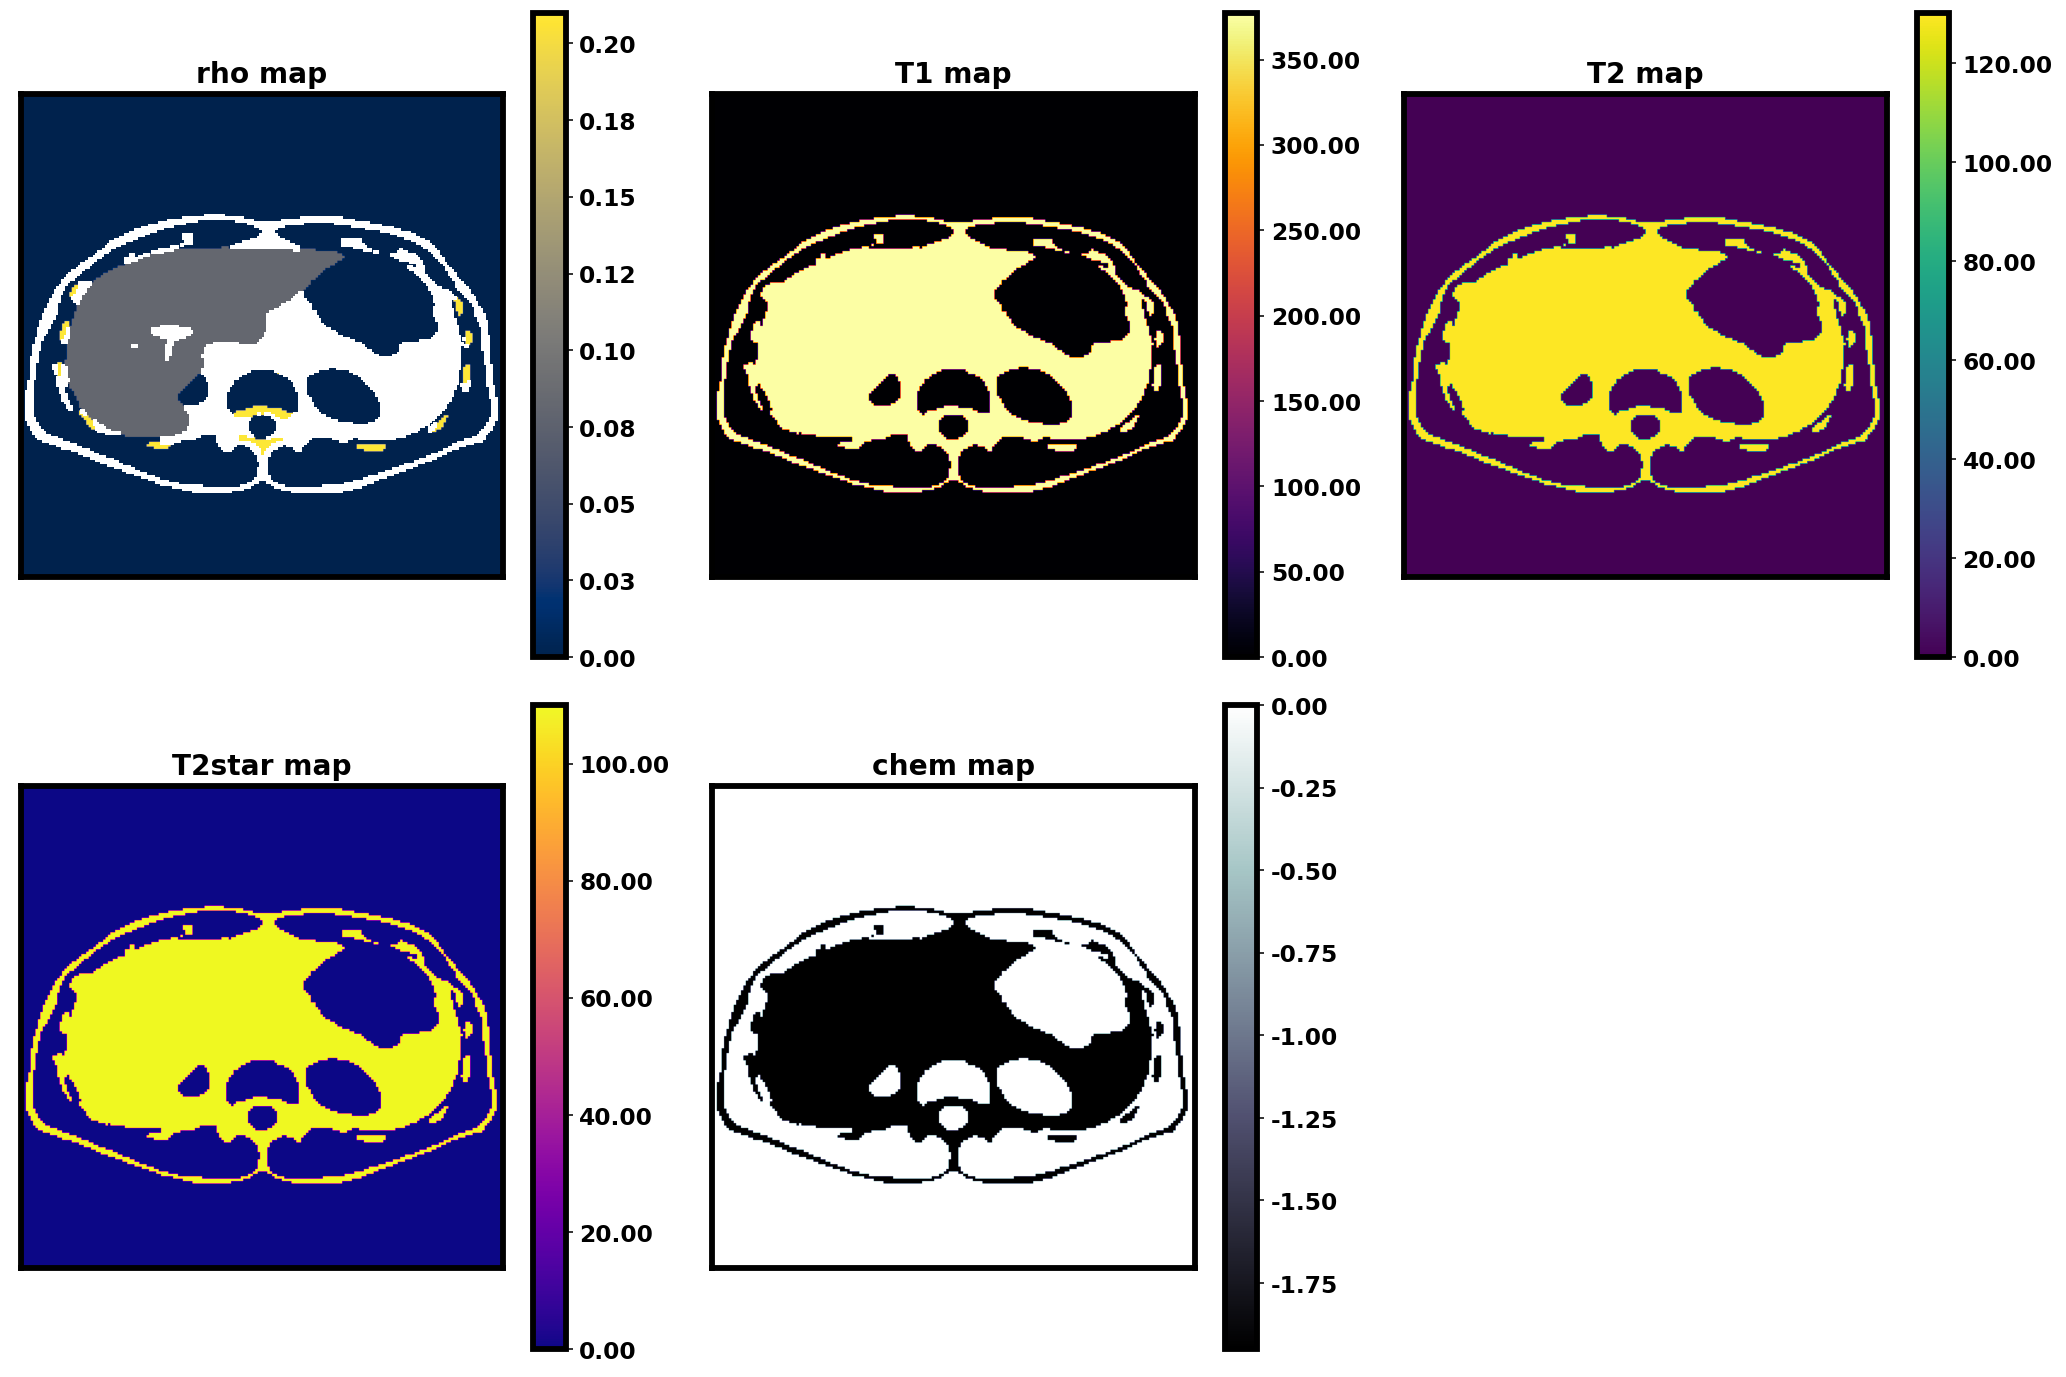

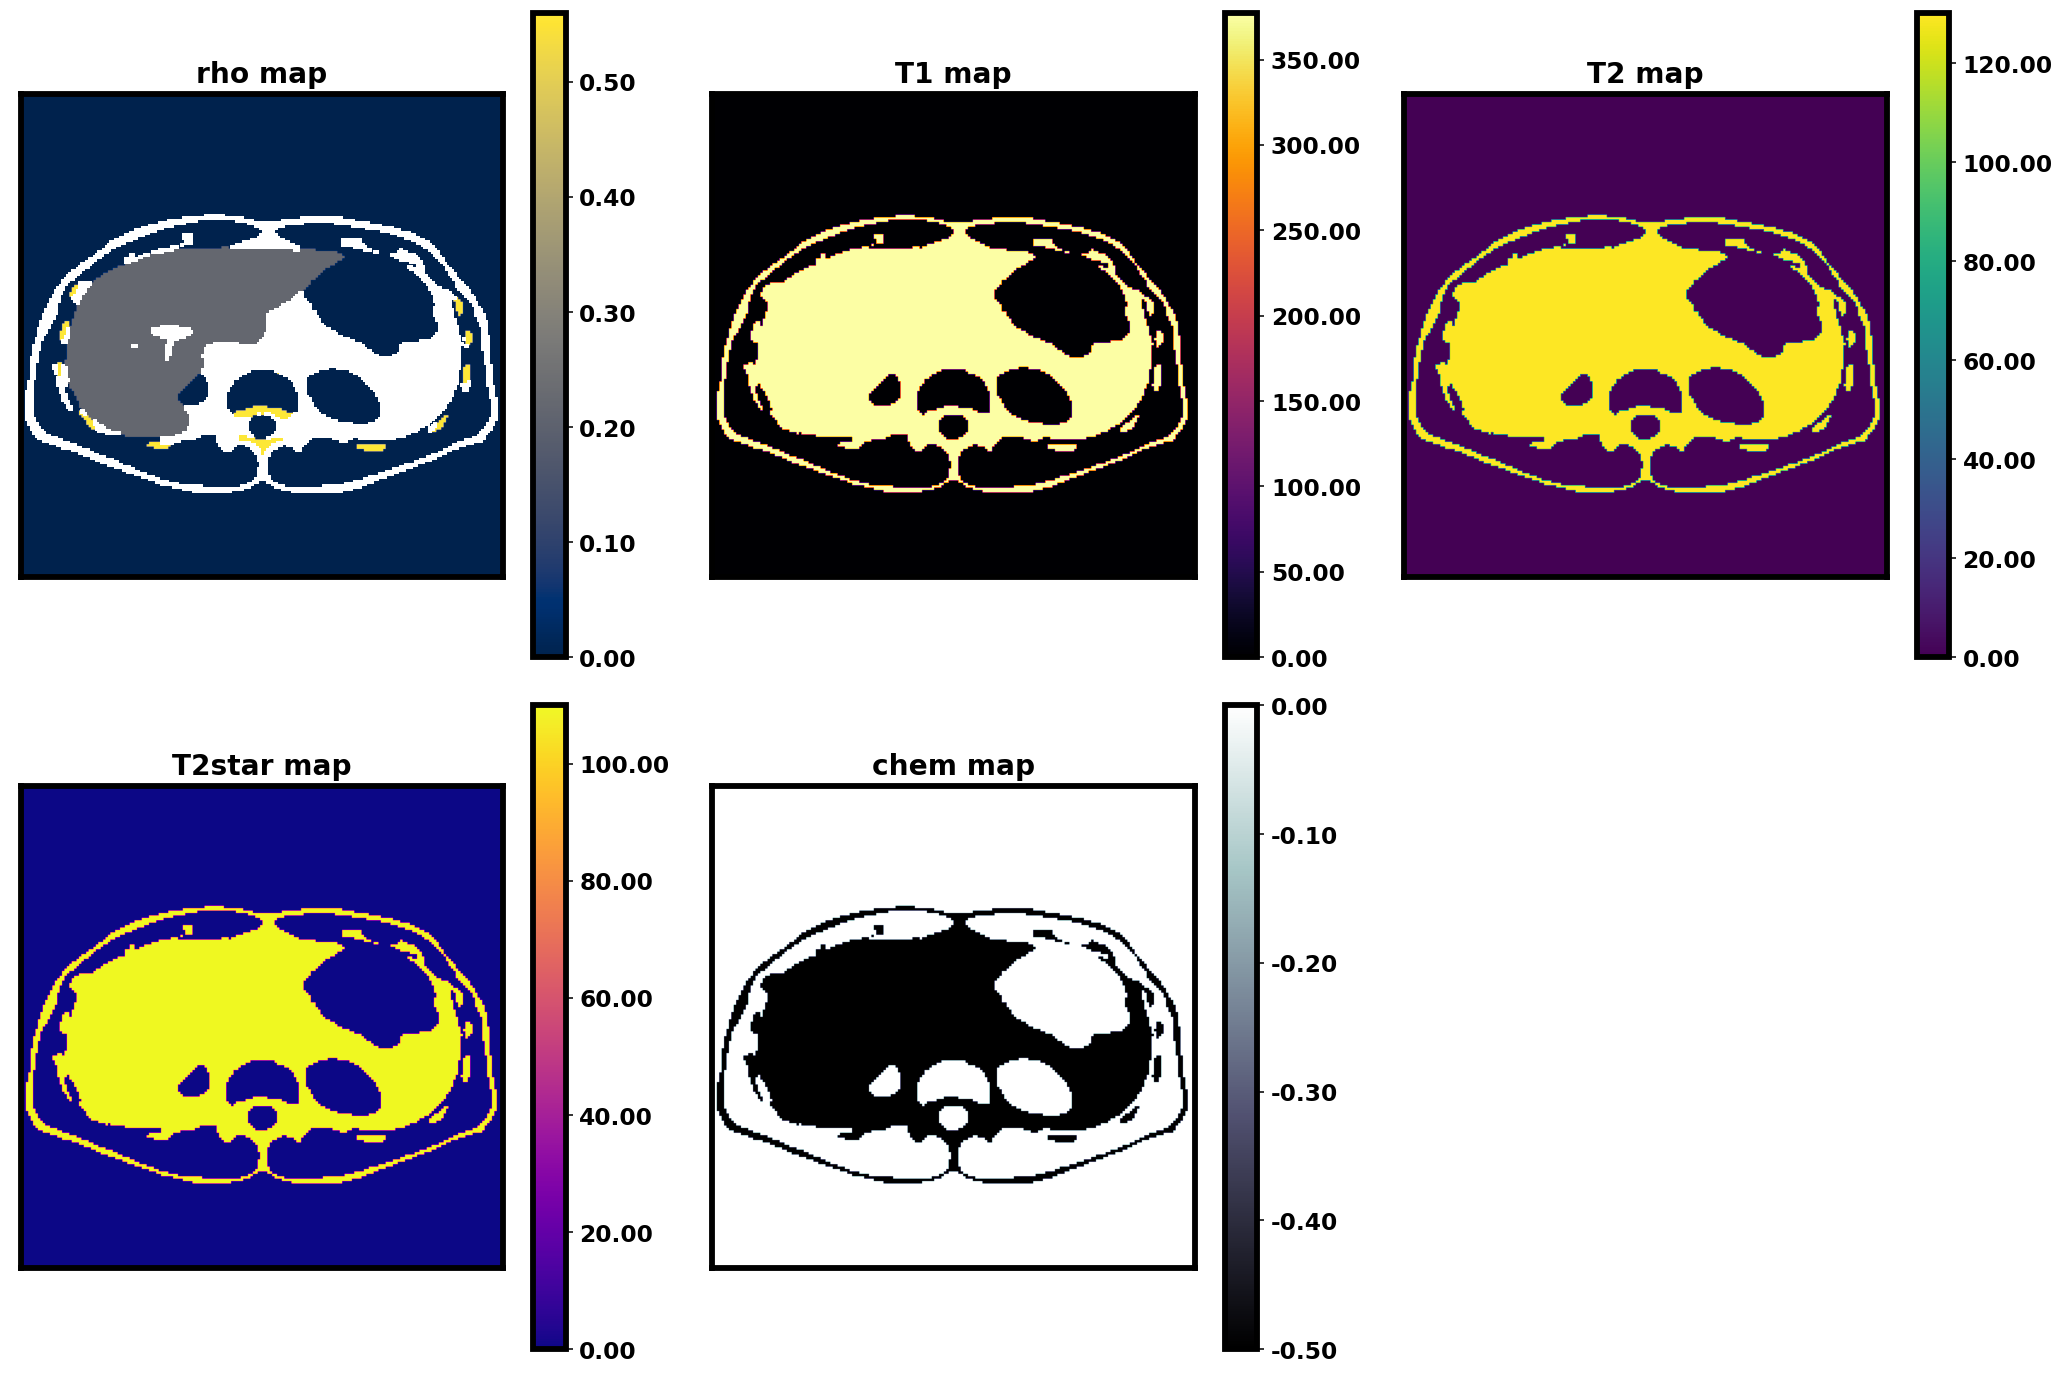

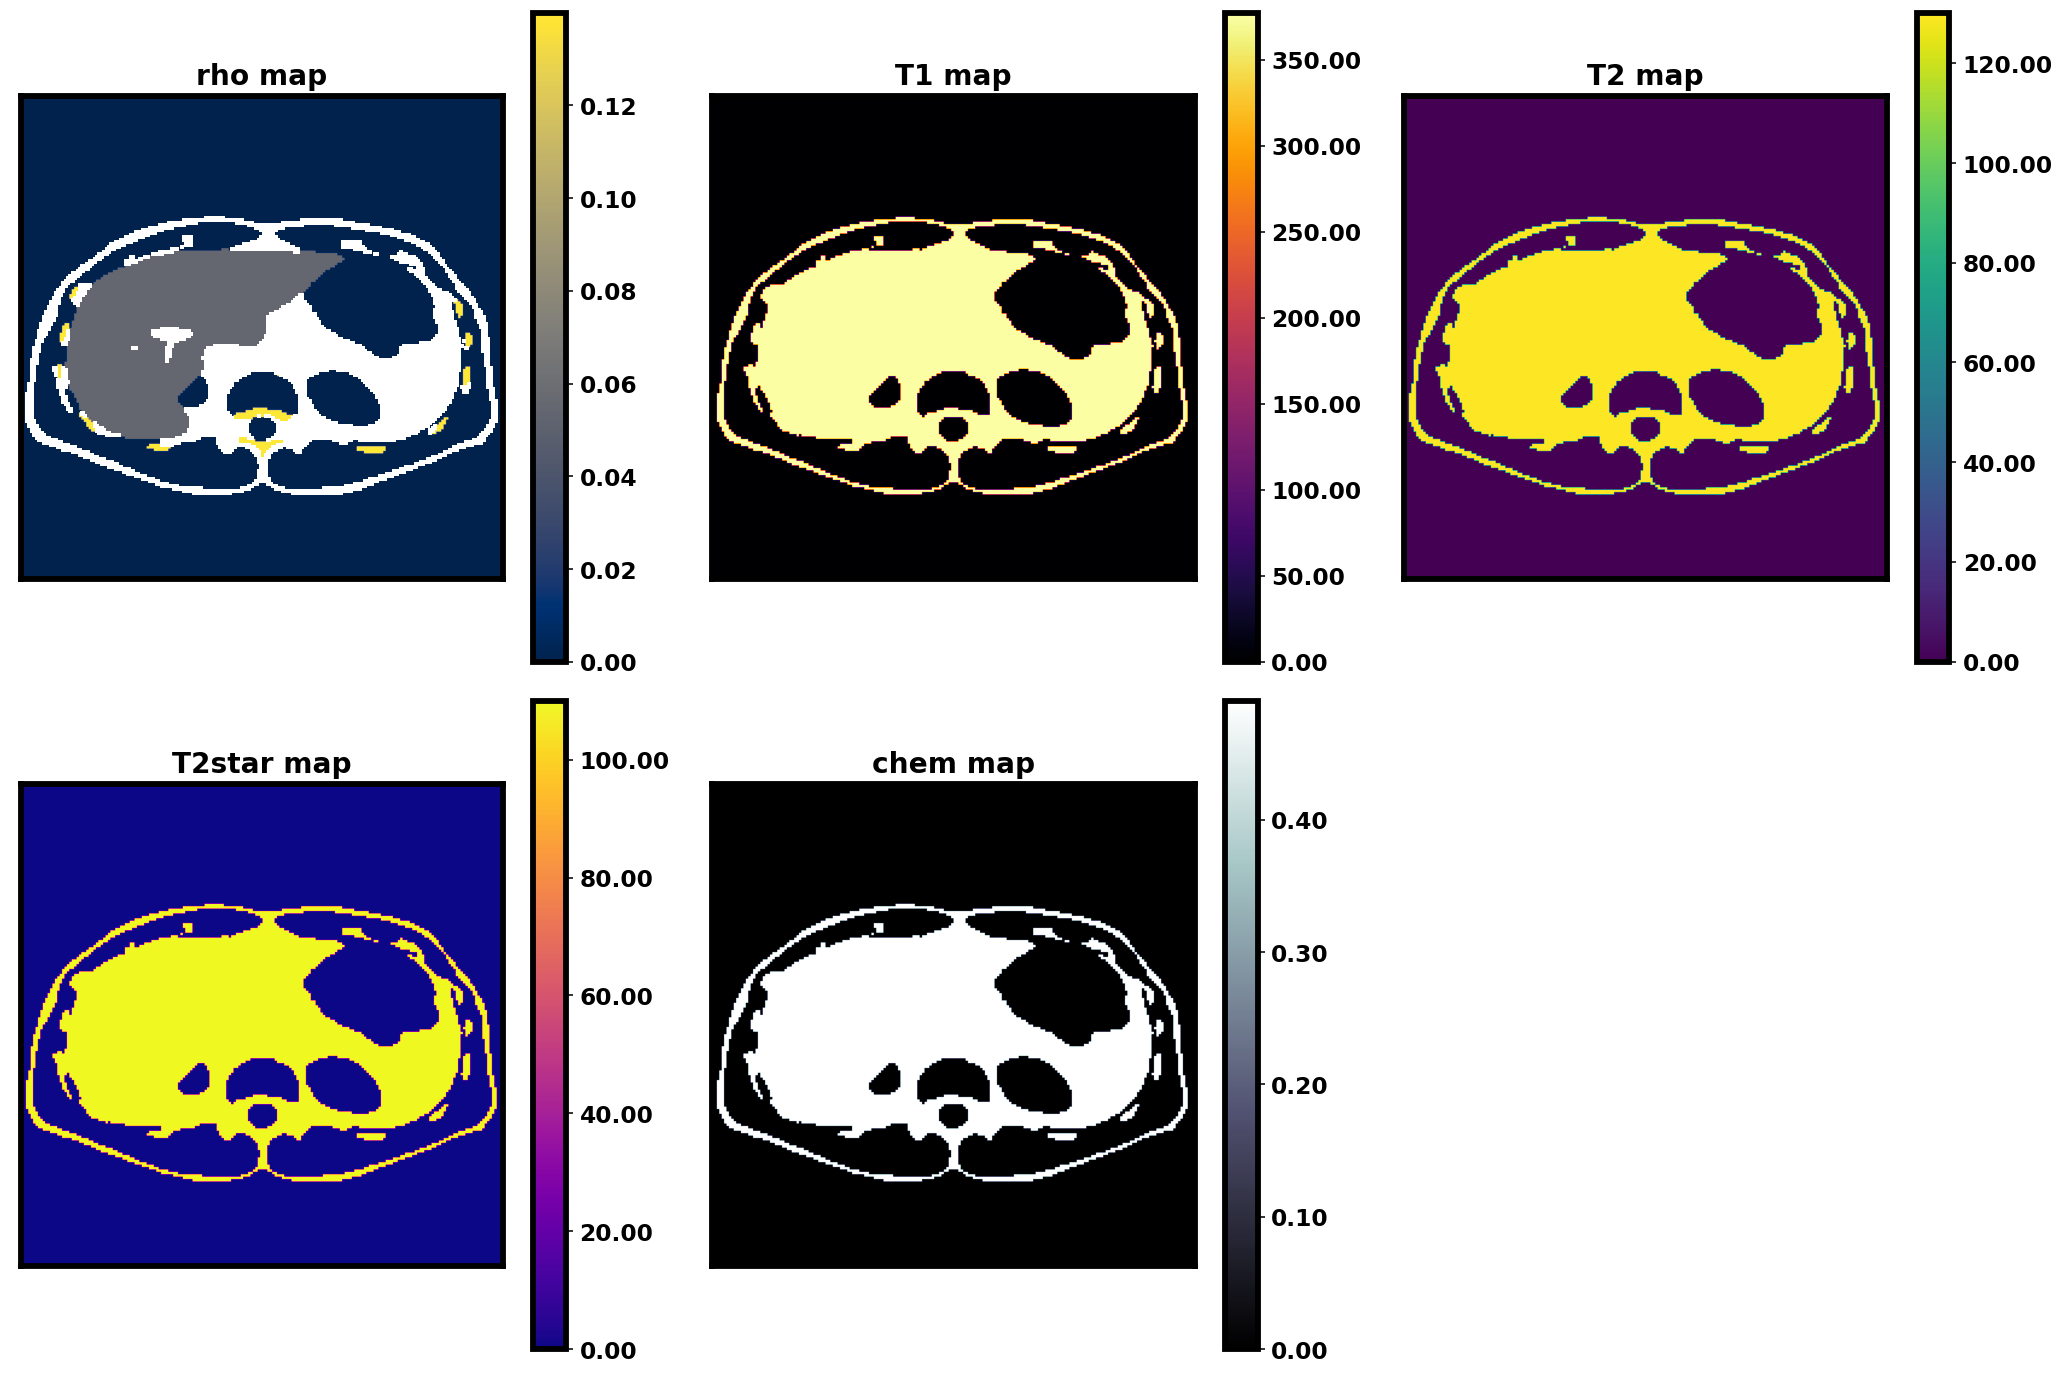

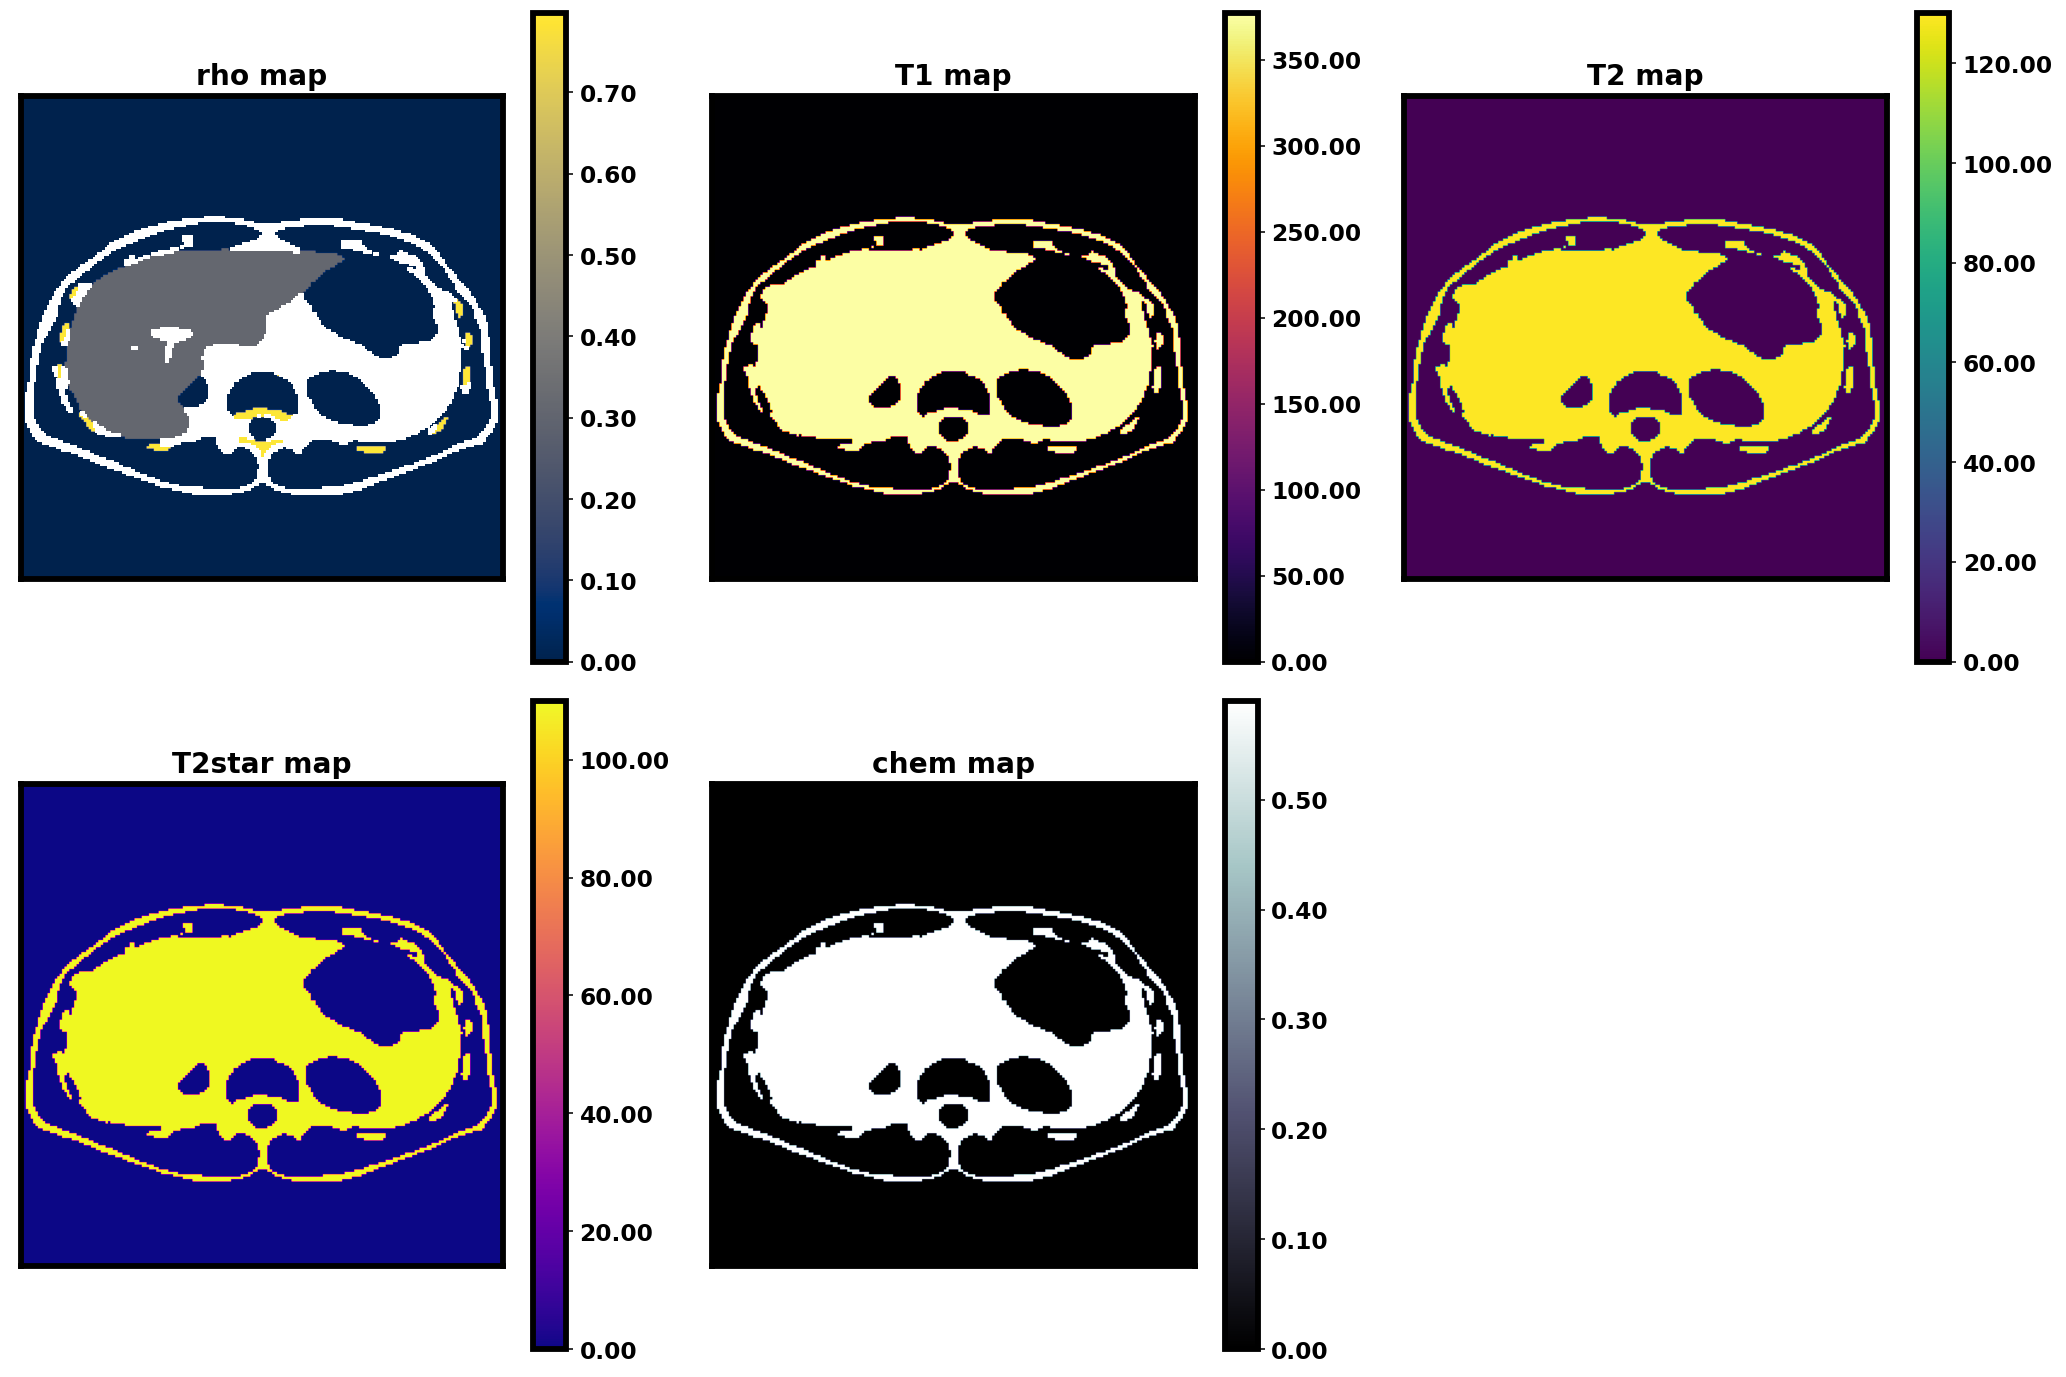

In [7]:
parameter_names = ["rho", "T1", "T2", "T2star", "chem"]
for i in range(9):
    maps = fat_maps[i, ...]
    plot_maps(maps, parameter_names, figname=f"Fat_Component_{i+1}")